### Mini-Batch Gradient Descent

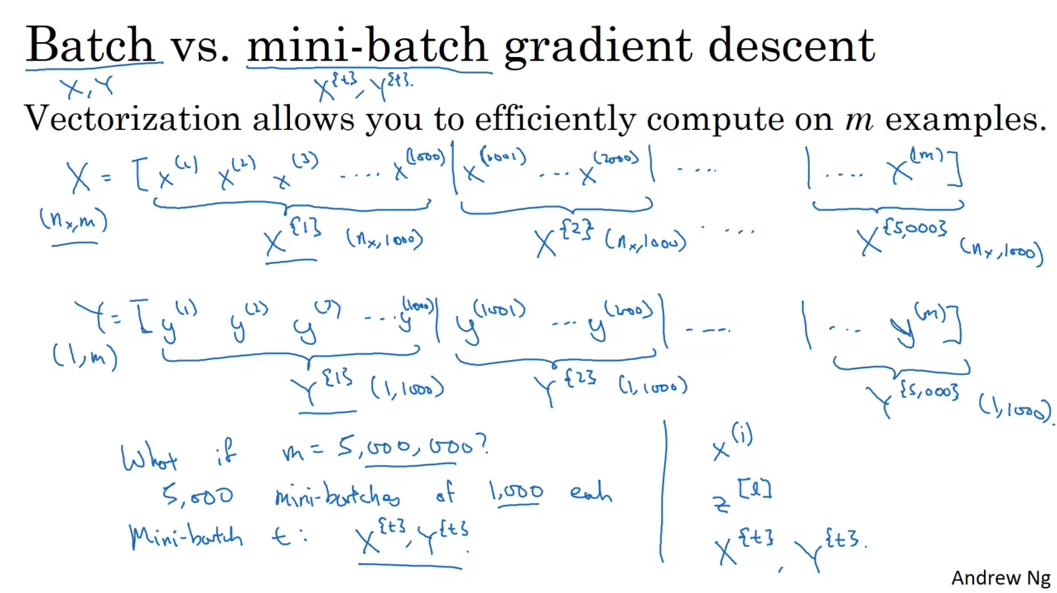

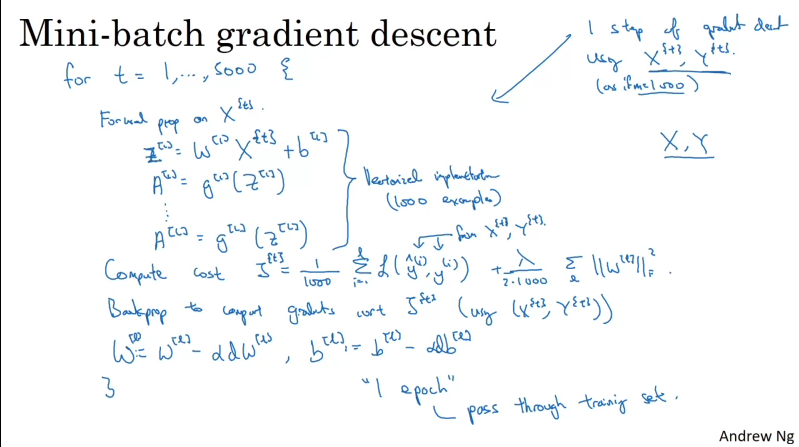

### Hiểu về Mini-Batch Gradient Descent

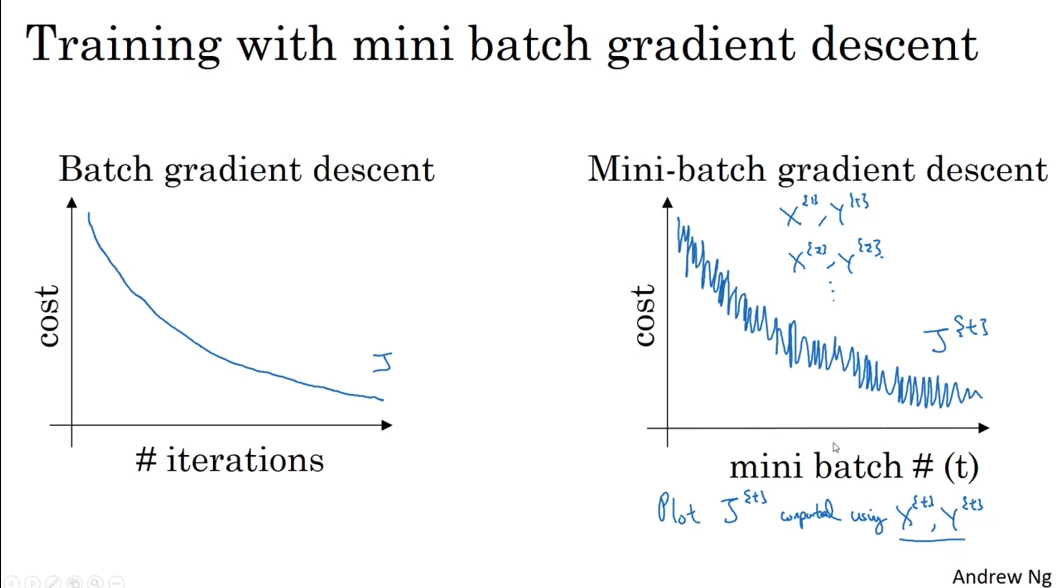

- Cách chọn tham số `batch_size`:
    - `batch_size = 1`: Stochastic Gradient Descent
    - `batch_size = m`: Batch Gradient Descent
    - `batch_size = 1 < batch_size < m`: Mini-Batch Gradient Descent

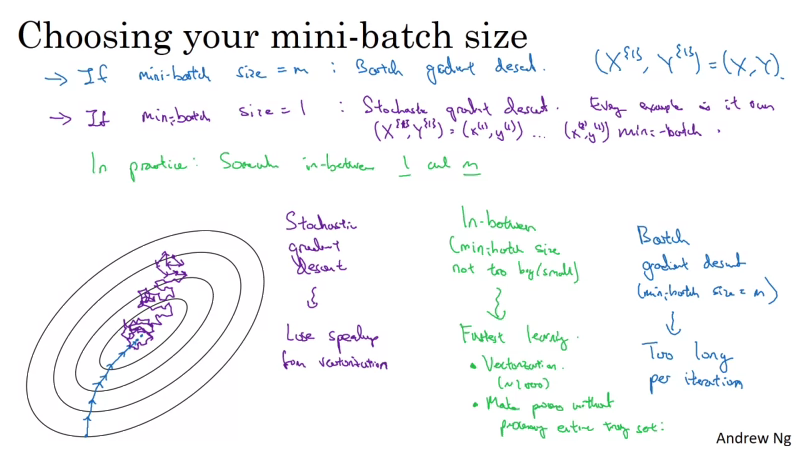

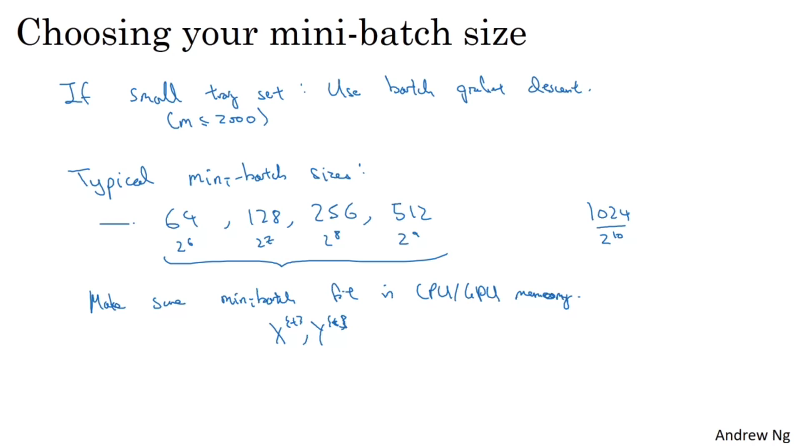

### Exponentially Weighted Averages

Còn có tên khác là Đường trung bình cộng trọng số mũ.

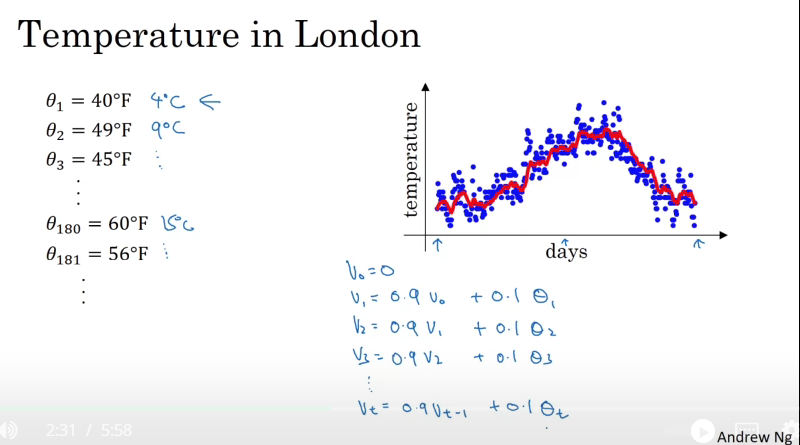

Hình ảnh trên mô tả nhiệt độ ở London trong khoảng thời gian 180 - 200 ngày. Đường màu đỏ là nhiệt độ thực tế, các chấm màu xanh là các điểm dữ liệu dựa trên nhiệt độ từ ngày 1 đến ngày 180.

- Công thức tính toán:
    - $V_t = \beta V_{t-1} + (1 - \beta) \theta_t$
    - $V_t = \frac{1}{1 - \beta} \sum_{i=0}^{t} \beta^{t-i} \theta_i$

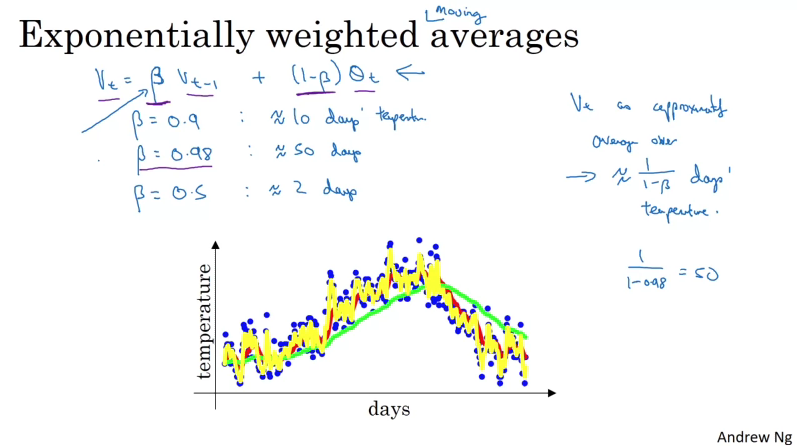

Từ đó ta nhận ra rằng, $\beta$ càng lớn thì đường trung bình càng mượt và ngược lại.

### Hiểu về Exponentially Weighted Averages

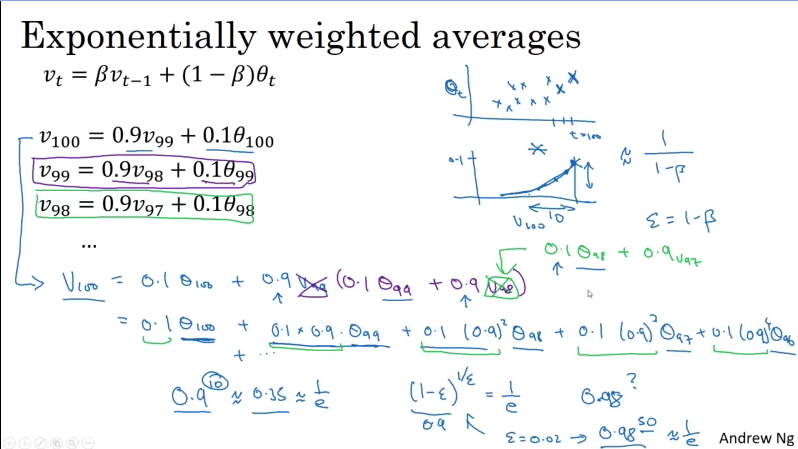

### Bias Correction in Exponentially Weighted Averages

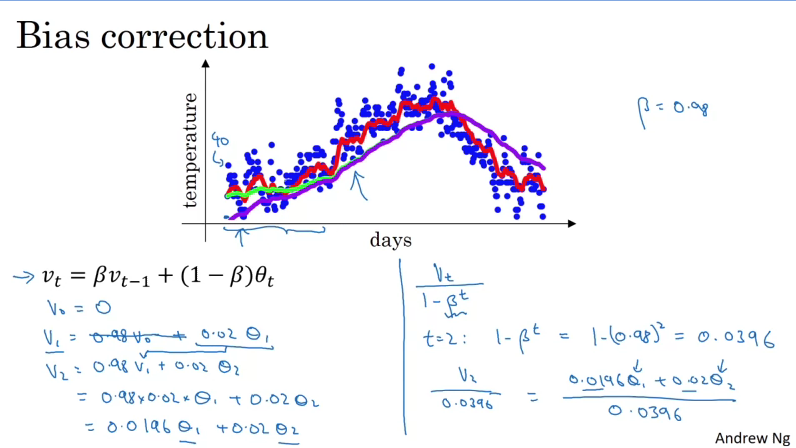

Với nửa đầu tiên bên trái, dựa vào công thức $v_t = \beta v_{t-1} + (1 - \beta) \theta_t$ tại $\beta = 0.98$, ta thấy rằng giá trị $v_t$ ban đầu sẽ rất nhỏ, gần bằng 0. Điều này dẫn đến việc đường trung bình sẽ bắt đầu từ 0 và dần dần tăng lên.

Giả sử như $\theta_1$ và $\theta_2$ đều dương thì khi nhân với $\beta$ nhiều lần, giá trị $v_t$ sẽ rất nhỏ và không thể hiện đúng giá trị trung bình của $\theta$.

Vì thế ta có một cách giải quyết là sử dụng công thức sau:

$$v_t = \frac{v_t}{1 - \beta^t}$$

Thì lúc đó, giá trị $v_t$ sẽ được chuẩn hóa và không bị ảnh hưởng bởi giá trị ban đầu.

### Gradient Descent With Momentum

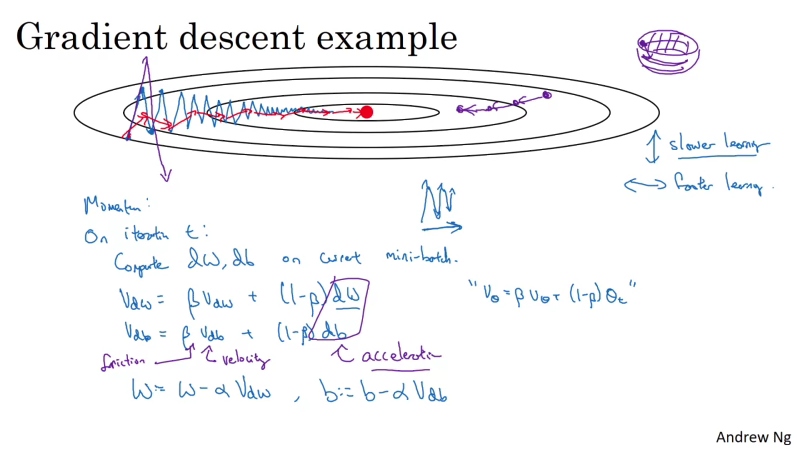

Với một Gradient thông thường cùng learning rate hợp lý, sau khi ta tính toán các giá trị, nó sẽ đi theo một quỹ đạo zic-zac hẹp và từng bước nhỏ (Đường màu xanh). Còn với Gradient Descent với learning rate lớn, ta sẽ có quỹ đạo lớn hơn nhưng vẫn zic-zac và quãng đường đi tìm cực tiểu của nó sẽ nhanh hơn (Đường màu tím).

Từ điều đó ta thấy được, quỹ đạo theo chiều dọc sẽ đại diện cho việc học hướng xuống cực tiểu, còn quỹ đạo theo chiều ngang sẽ đại diện cho việc học nhanh hơn.

Với Momentum, ta sẽ sử dụng Exponentially Weighted Averages để tính toán giá trị $v_t$ và sau đó sử dụng giá trị đó để cập nhật giá trị $\theta$.
- Từ đó, các bước dao động sẽ nhỏ hơn và quỹ đạo sẽ hướng về cực tiểu một cách nhanh chóng. (Đường màu đỏ)
- Tính chất của Momentum giống như quả cầu lăn trên mặt núi, nó sẽ giúp cho quả cầu lăn không bị lăn ngược lại cực tiểu.

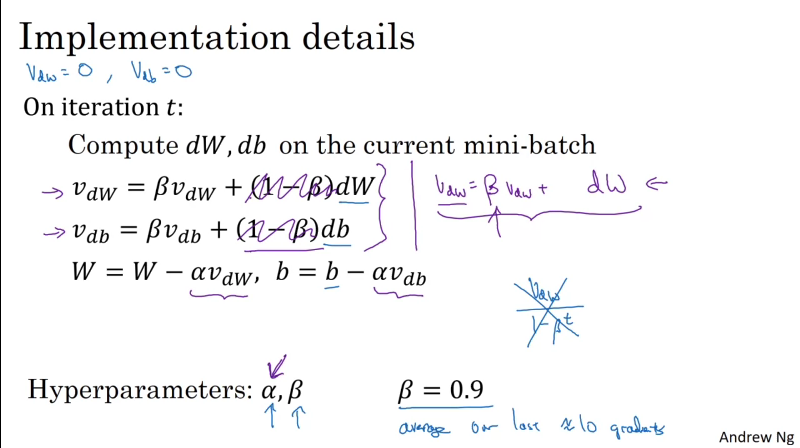

Tại sao GD with Momentum không cần Bias Correction?
- Bởi vì trong Momentum, trong khoảng 10 vòng lặp, đường trung bình sẽ tăng lên rất nhanh và sau đó sẽ ổn định

Tại sao số hạng $1 - \beta$ thường bị bỏ qua?
- Với công thức màu tím, ta thấy $v_{dW}$ được chia theo tỷ lệ với hệ số $1 - \beta$ hoặc $\frac{1}{1 - \beta}$, và vì vậy, khi thực hiện cập nhật gradient descent, $\alpha$ chỉ cần thay đổi bởi một giá trị tương ứng với $\frac{1}{1 - \beta}$.
- Cả hai công thức đều hoạt động ổn định nhưng nó chỉ ảnh hưởng tới giá trị tốt nhất của $\alpha$.
- Ngoài ra công thức tím sẽ kém trực quan hơn vì ta sẽ điều chỉnh hyperparameter $\beta$ thì nó cũng sẽ ảnh hưởng tới giá trị $\alpha$ và $v_{dW}$ khi thực hiện cập nhật.

### RMSprop (Root Mean Square Propagation)

- RMSprop sử dụng Exponentially Weighted Averages để cập nhật giá trị $S_{dW}$ và sau đó sử dụng giá trị đó để cập nhật giá trị $\theta$.

Giả sử ta có Gradient biểu diễn như sau:
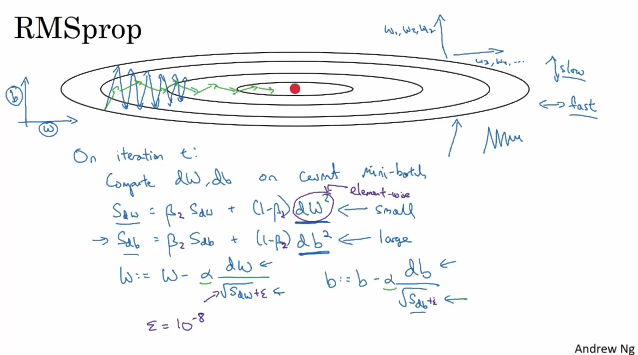

- Với $b$ biểu thị cho cột dọc và $w$ cho cột ngang, mục tiêu của RMSprop là giảm đi quá trình dao động theo chiều dọc ($b$) và tăng tốc độ học theo chiều ngang ($w$).

Từ công thức trên, ta sẽ hi vọng rằng giá trị của $dW$ nhỏ để tăng tốc độ học và giá trị của $db$ lớn để giảm quá trình dao động. Với mục tiêu chính là kiểm soát sự thay đổi của Gradient dựa trên độ lớn của nó; hạn chế được Gradient Exploding và Gradient Vanishing.

Nhưng với việc chia cho căn bậc hai, ta rất dễ có khả năng đối mặt với việc $S_{dW}$ bằng 0, điều này sẽ dẫn đến việc $\alpha$ sẽ bằng 0 và không thể cập nhật được $\theta$. Vì vậy khi ta cập nhật $w$ và $b$, ta sẽ thêm một giá trị $\epsilon$ rất nhỏ vào để tránh trường hợp trên.

$$\theta = \theta - \frac{\alpha}{\sqrt{S_{dW}} + \epsilon} dW$$


### Adam Optimization Algorithm

- Adam là sự kết hợp giữa Momentum và RMSprop.

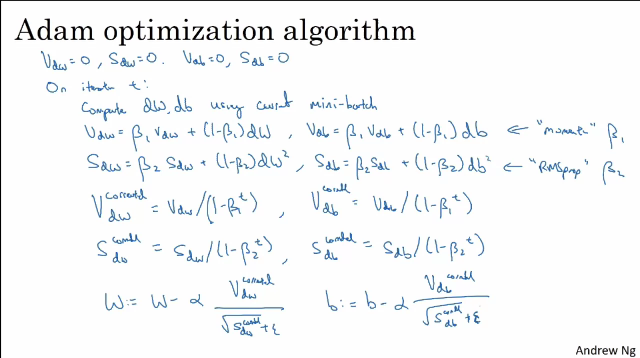

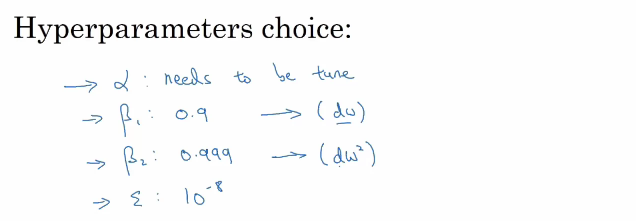

Ngoài ra Adam còn được gọi là Adaptive Moment Estimation, nó sẽ cập nhật giá trị $v_{dW}$ và $S_{dW}$ dựa trên giá trị $\beta_1$ và $\beta_2$.

### Learning Rate Decay

- Learning Rate Decay là một kỹ thuật giảm learning rate theo thời gian hoặc theo số lần lặp.
- Do Learning rate sẽ là một tham số cố định, nên đôi khi nó sẽ mất hiệu quả khi tiến tới cực tiểu.

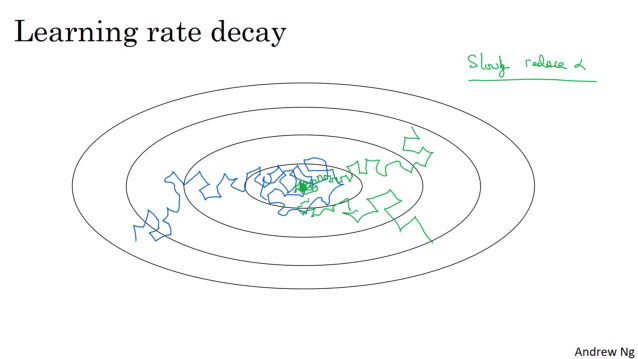

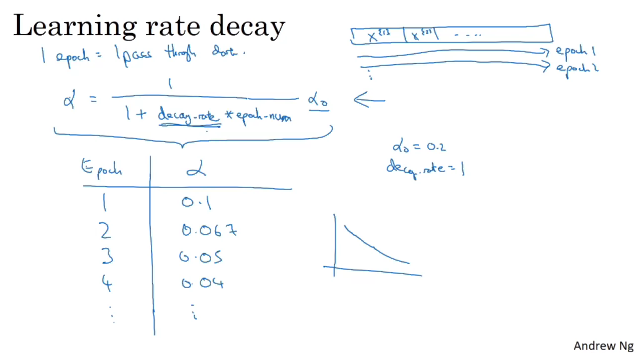

- Learning Rate Decay sẽ giúp cho việc học tốt hơn và giảm thiểu việc dao động.
- Ngoài ra, ta còn có Expoential Decay, Inverse Decay, Step Decay, Polynomial Decay, Sqrt Decay hay Manual Decay.

### The problems of local optima

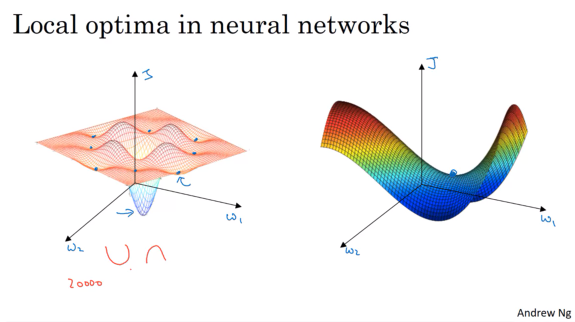

Bên trái là hình ảnh mà mọi người thường nghĩ đến khi họ lo lắng về tối ưu cục bộ. 
Giả sử ta đang cố gắng tối ưu hóa một số bộ tham số, gọi chúng là W1 và W2, và chiều cao trên bề mặt là hàm chi phí. Trong bức ảnh này, có vẻ như có rất nhiều điểm tối ưu cục bộ ở tất cả những nơi đó. Và sẽ dễ dàng cho việc phân loại ý nghĩa hoặc một trong các thuật toán khác bị mắc kẹt ở mức tối ưu cục bộ thay vì tìm đường đến mức tối ưu toàn cục. 

Hóa ra là nếu vẽ một hình như thế này theo hai chiều, thì có thể dễ dàng tạo ra những đồ thị như thế này với rất nhiều tối ưu cục bộ khác nhau.


Còn bên phải, một mạng lưới thần kinh, hầu hết các điểm có độ dốc bằng 0 không phải là điểm tối ưu cục bộ như thế này. Thay vào đó, hầu hết các điểm có độ dốc bằng 0 trong hàm chi phí đều là điểm yên ngựa (***saddle point***). 

Vì vậy, đó là điểm mà gradient bằng 0, một lần nữa, có thể là W1, W2, và chiều cao là giá trị của hàm chi phí J. Nhưng một cách không chính thức, là một hàm của không gian có nhiều chiều, nếu gradient bằng 0, thì trong mỗi hướng nó có thể là hàm lồi hoặc hàm lõm.